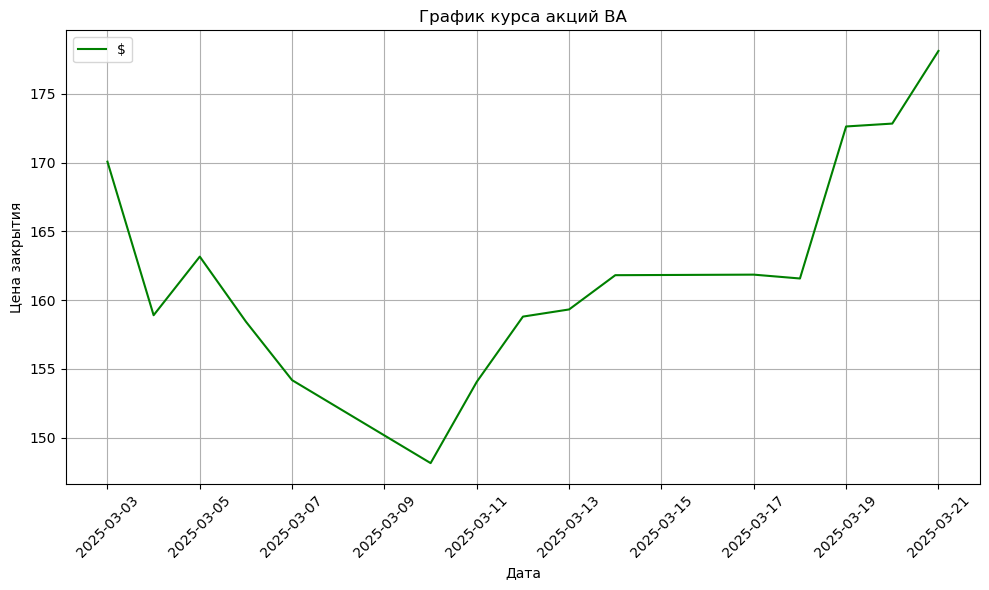

In [76]:
# Вывод графика курса акции (или фондового индекса) за заданный период
import yfinance as yf
import matplotlib.pyplot as plt

a = 'BA'
start_date = '2025-03-01'
end_date = '2025-03-24'

def get_stock_data(x, start_date, end_date):

    ticker = x
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    
    if df.empty:
        print(f'Нет данных для {ticker} за период {start_date} - {end_date}')
        return pd.DataFrame()
    
    return df

stock_df = get_stock_data(a, start_date, end_date)

if not stock_df.empty:

    plt.figure(figsize=(10, 6))
    plt.plot(stock_df.index, stock_df['Close'], label='$', color='green')
    plt.title(f'График курса акций {a}')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Не удалось загрузить данные')

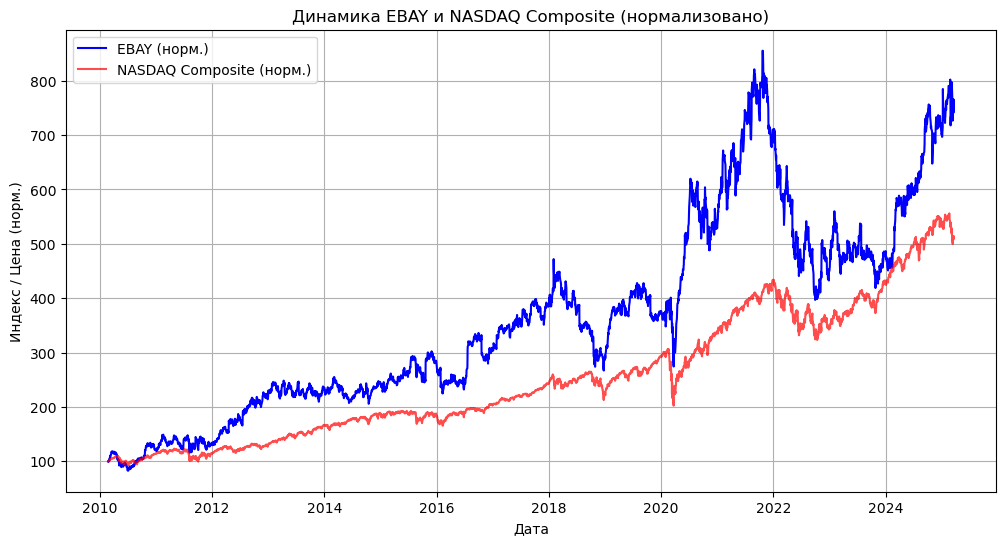

Итоговая цена вложений составила 148.62% от вложений в индекс
Среднегодовая доходность вложений в NASDAQ составила 11.52%
Среднегодовая доходность вложений в EBAY составила 14.51%


In [27]:
# Ячейка для вывода графиков индекса NASDAQ и какой-то акции
# В конце - то, на сколько процентов рост акции обогнал рынок
import yfinance as yf
import matplotlib.pyplot as plt

a = 'EBAY'
start_date = '2010-02-24'
end_date = '2025-03-20'

stock_df = yf.download(a, start=start_date, end=end_date, progress=False)
nasdaq_df = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

if stock_df.empty or nasdaq_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    # Нормализуем данные, чтобы отобразить их на одном графике
    stock_norm = stock_df['Close'] / stock_df['Close'].iloc[0] * 100
    nasdaq_norm = nasdaq_df['Close'] / nasdaq_df['Close'].iloc[0] * 100

    plt.figure(figsize=(12, 6))
    plt.plot(stock_df.index, stock_norm, label=f'{a} (норм.)', color='blue')
    plt.plot(nasdaq_df.index, nasdaq_norm, label='NASDAQ Composite (норм.)', color='red', alpha=0.7)

    plt.xlabel('Дата')
    plt.ylabel('Индекс / Цена (норм.)')
    plt.title(f'Динамика {a} и NASDAQ Composite (нормализовано)')
    plt.legend()
    plt.grid()
    plt.show()
    w = round(float(stock_norm.iloc[-1]) * 100/float(nasdaq_norm.iloc[-1]), 2)
    r = 1 / (-int(start_date[:4]) + int(end_date[:4]))
    print(f'Итоговая цена вложений составила {w}% от вложений в индекс')
    print(f'Среднегодовая доходность вложений в NASDAQ составила {round((100 * (float(nasdaq_norm.iloc[-1])/float(nasdaq_norm.iloc[0])) ** r) - 100, 2)}%')
    print(f'Среднегодовая доходность вложений в {a} составила {round((100 * (float(stock_norm.iloc[-1])/float(stock_norm.iloc[0])) ** r) - 100, 2)}%')

In [558]:
# Ячейка для рассчета беты акции (степень колебаний курса акции относительно колебаний рынка в целом)
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import linregress

a = 'BTC-USD'

start_date = '2020-03-01'
end_date = '2025-03-01'

action_df = yf.download(a, start=start_date, end=end_date, progress=False)
index_df = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

if action_df.empty or nasdaq_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    
    action_df['Returns'] = action_df['Close'].pct_change()
    index_df['Returns'] = nasdaq_df['Close'].pct_change()

    merged_df = pd.merge(action_df['Returns'], index_df['Returns'], left_index=True, right_index=True, suffixes=('_ACTION', '_INDEX')).dropna()

    slope, _, _, _, _ = linregress(merged_df['Returns_INDEX'], merged_df['Returns_ACTION'])

    print(f'Коэффициент бета относительно индекса за указанный временной промежуток: {slope:.4f}')

Коэффициент бета относительно индекса за указанный временной промежуток: 1.0830


In [47]:
# Рассчет стандартного отклонения ежедневной доходности акции
import yfinance as yf
import numpy as np

a = 'BTC-USD'
start_date = '2015-03-01'
end_date = '2025-03-01'

tesla_df = yf.download(a, start=start_date, end=end_date, progress=False)

if tesla_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    # Рассчитываем дневные доходности
    tesla_df['Returns'] = tesla_df['Close'].pct_change()
    std_dev = tesla_df['Returns'].std()

    print(f'Стандартное отклонение дневной доходности компании с тикером {a}: {std_dev:.4%}')

Стандартное отклонение дневной доходности компании с тикером BTC-USD: 3.5596%


In [48]:
# Получение финансовой отчетности интересующей компании
import yfinance as yf

tesla = yf.Ticker('RDFN')
print(tesla.financials)

                                                      2024-12-31  \
Tax Effect Of Unusual Items                              20211.2   
Tax Rate For Calcs                                        0.0032   
Normalized EBITDA                                   -101099000.0   
Total Unusual Items                                    6316000.0   
Total Unusual Items Excluding Goodwill                 6316000.0   
Net Income From Continuing Operation Net Minori...  -164801000.0   
Reconciled Depreciation                               42768000.0   
Reconciled Cost Of Revenue                           678778000.0   
EBITDA                                               -94783000.0   
EBIT                                                -137551000.0   
Net Interest Income                                  -21432000.0   
Interest Expense                                      27780000.0   
Interest Income                                        6348000.0   
Normalized Income                               

In [574]:
# Рассчет коэффициента Шарпа за год
import yfinance as yf
import numpy as np

a = 'NVDA'
start_date = '2023-03-01'
end_date = '2024-03-01'

stock_df = yf.download(a, start=start_date, end=end_date, progress=False)

stock_df['Returns'] = stock_df['Close'].pct_change()

# Безрисковая дневная доходность (252 торговых дня в году)
risk_free_rate = 0.07 / 252 

# Средняя доходность акции
mean_return = stock_df['Returns'].mean()

std_dev = stock_df['Returns'].std()

sharpe_ratio = (mean_return - risk_free_rate) / std_dev * np.sqrt(252) 

print(f'Коэффициент Шарпа для {a}: {sharpe_ratio:.4f}')

Коэффициент Шарпа для NVDA: 2.7743


Годовая доходность от вложений в индекс: -27.28%
Волатильность вложений в индекс: 15.51%
Коэффициент Шарпа: -2.02
Среднегодовая доходность портфеля: -8.03%
Годовая волатильность портфеля: 3.00%
Коэффициент Шарпа портфеля: -3.67
      Актив  Доля в портфеле %
0       XOM           9.391885
1       CVX           6.637929
2       IBM          12.746068
3      AAPL           3.624350
4      TSLA           4.160189
5        KO          11.945766
6      GC=F           5.158407
7       JPM           3.892443
8   BTC-USD           7.006250
9      AMZN          10.054252
10     SBUX           4.980197
11    BRK-B          11.330847
12       GS           9.071418


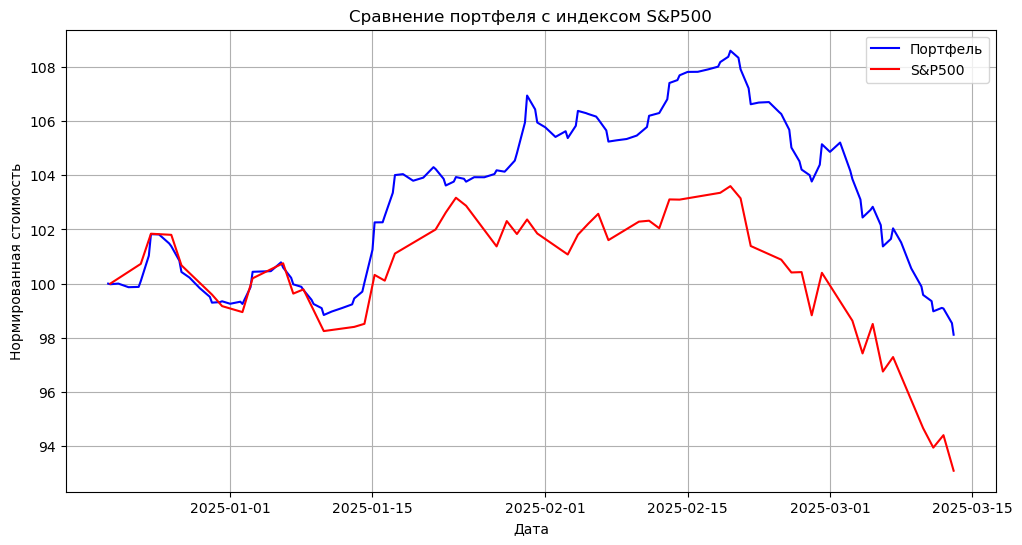

In [92]:
# Сравнение показателей инвестиционного портфеля и вложений в S&P 500
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

start_date = '2024-12-20'
end_date = '2025-03-14'

portfolio = {
    'XOM': 5000,     # Exxon 
    'CVX': 2500,     # Shevron
    'IBM': 3000,     # IBM
    'AAPL': 1000,    # Apple
    'TSLA': 1000,    # Tesla 
    'KO': 10000,     # Coca-cola 
    'GC=F': 100,     # Gold
    'JPM': 1000,     # JPmorgan
    'BTC-USD': 5,    # Bitcoin
    'AMZN': 3000,    # Amazon
    'SBUX': 3000,    # Starbucks
    'BRK-B': 1300,   # Berkshire Hathaway
    'GS': 1000       # Goldman Sachs
            }

warnings.filterwarnings('ignore', category=FutureWarning)

def get_portfolio_value(portfolio, start_date, end_date):

    prices = {}
    dividends = {}

    for ticker in portfolio:
        stock = yf.Ticker(ticker)
        data = stock.history(start=start_date, end=end_date)
        prices[ticker] = data['Close'] * portfolio[ticker]

        if 'Dividends' in data.columns:
            dividends[ticker] = data['Dividends'] * portfolio[ticker]

    portfolio_df = pd.DataFrame(prices)
    portfolio_df.interpolate(method='linear', inplace=True)
    portfolio_df.fillna(method='bfill', inplace=True) 
    portfolio_df.fillna(method='ffill', inplace=True)
    portfolio_df['Total Value'] = portfolio_df.sum(axis=1)

    dividends_df = pd.DataFrame(dividends).fillna(0)
    portfolio_df['Total Value'] += dividends_df.sum(axis=1).cumsum()

    portfolio_df['Normalized'] = portfolio_df['Total Value'] * 100 / portfolio_df['Total Value'].iloc[0]

    return portfolio_df

def get_index_data(start_date, end_date):

    index = yf.Ticker('^GSPC')
    data = index.history(start=start_date, end=end_date)
    data['Normalized'] = data['Close'] * 100 / data['Close'].iloc[0]

    return data

def calculate_metrics(portfolio_df, risk_free_rate=0.03):

    portfolio_df['Daily Returns'] = portfolio_df['Total Value'].pct_change()

    start_value = portfolio_df['Total Value'].iloc[0]
    end_value = portfolio_df['Total Value'].iloc[-1]
    num_years = (portfolio_df.index[-1] - portfolio_df.index[0]).days / 365.25
    cagr = (end_value / start_value) ** (1 / num_years) - 1

    annual_volatility = portfolio_df['Daily Returns'].std() * np.sqrt(252 * num_years)
    
    excess_return = cagr - risk_free_rate
    sharpe_ratio = excess_return / annual_volatility if annual_volatility != 0 else np.nan

    return cagr, annual_volatility, sharpe_ratio

def calculate_index_metrics(start_date, end_date, risk_free_rate=0.04):

    index = yf.Ticker('^GSPC')
    data = index.history(start=start_date, end=end_date)

    data['Daily Returns'] = data['Close'].pct_change()

    start_value = data['Close'].iloc[0]
    end_value = data['Close'].iloc[-1]
    num_years = (data.index[-1] - data.index[0]).days / 365.25
    cagr = (end_value / start_value) ** (1 / num_years) - 1

    annual_volatility = data['Daily Returns'].std() * np.sqrt(252)

    excess_return = cagr - risk_free_rate
    sharpe_ratio = excess_return / annual_volatility if annual_volatility != 0 else np.nan

    return cagr, annual_volatility, sharpe_ratio

def get_portfolio_allocation(portfolio, portfolio_df):

    last_values = {ticker: portfolio_df[ticker].iloc[-1] for ticker in portfolio}
    total_value = sum(last_values.values())

    allocation = {ticker: value / total_value * 100 for ticker, value in last_values.items()}
    allocation_df = pd.DataFrame(list(allocation.items()), columns=['Актив', 'Доля в портфеле %'])
    
    return allocation_df

cagr_index, volatility_index, sharpe_index = calculate_index_metrics(start_date, end_date)
print(f'Годовая доходность от вложений в индекс: {cagr_index:.2%}')
print(f'Волатильность вложений в индекс: {volatility_index:.2%}')
print(f'Коэффициент Шарпа: {sharpe_index:.2f}')

portfolio_df = get_portfolio_value(portfolio, start_date, end_date)
index_df = get_index_data(start_date, end_date)

cagr, volatility, sharpe_ratio = calculate_metrics(portfolio_df)

print(f'Среднегодовая доходность портфеля: {cagr:.2%}')
print(f'Годовая волатильность портфеля: {volatility:.2%}')
print(f'Коэффициент Шарпа портфеля: {sharpe_ratio:.2f}')

allocation_df = get_portfolio_allocation(portfolio, portfolio_df)
print(allocation_df)

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['Normalized'], label='Портфель', color='b')
plt.plot(index_df.index, index_df['Normalized'], label='S&P500', color='r', linestyle='solid')
plt.xlabel('Дата')
plt.ylabel('Нормированная стоимость')
plt.title('Сравнение портфеля с индексом S&P500')
plt.legend()
plt.grid()
plt.show()

Ticker    9988.HK      AAPL       AGG       AMT      AMZN      ARKK      ASML  \
Ticker                                                                          
9988.HK  1.000000  0.078851  0.021235 -0.021314  0.016896  0.051891  0.106237   
AAPL     0.078851  1.000000  0.179581  0.054583  0.351333  0.408413  0.268772   
AGG      0.021235  0.179581  1.000000  0.560397 -0.029075  0.119166 -0.061986   
AMT     -0.021314  0.054583  0.560397  1.000000 -0.127663 -0.095575 -0.198122   
AMZN     0.016896  0.351333 -0.029075 -0.127663  1.000000  0.611918  0.420968   
...           ...       ...       ...       ...       ...       ...       ...   
VWOB     0.076832  0.347718  0.819498  0.458963  0.249751  0.428156  0.173580   
WCLD     0.023145  0.353239  0.082871 -0.029675  0.614483  0.786301  0.367414   
WEAT     0.121270 -0.030008  0.044082 -0.010397 -0.027452 -0.051185 -0.020376   
WOOD     0.201688  0.243404  0.281358  0.291000  0.302634  0.469463  0.340228   
XOM      0.084741  0.026859 

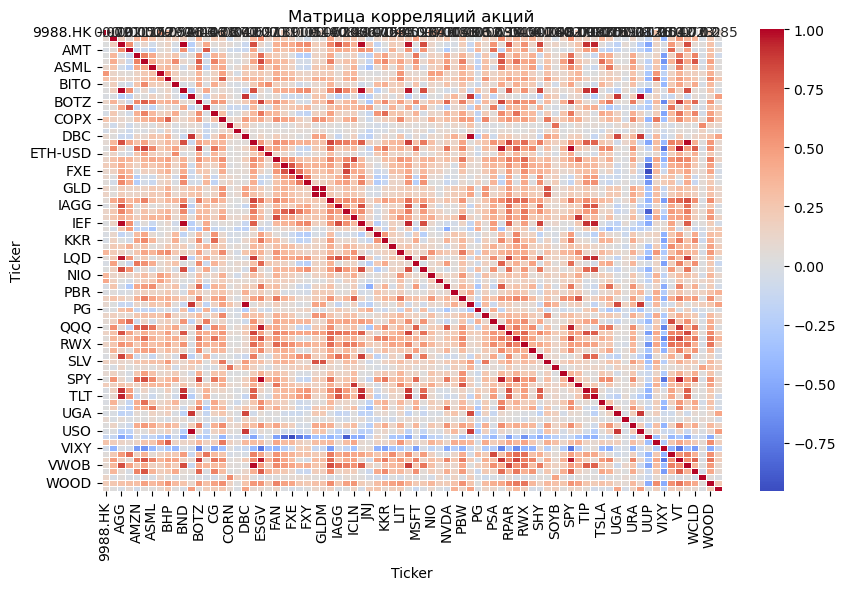

In [87]:
# Матрица корреляций межлду акциями и индексами
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

start_date = '2024-03-24'
end_date = '2025-03-24'



data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']

returns = data.pct_change().dropna()

correlation_matrix = returns.corr()

print(correlation_matrix)
correlation_matrix.to_csv('FinCor.csv')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций акций')
plt.show()

In [34]:
# Получение исторической информации об инфляуии и ставках ФРС (если это анализ именно американского рынка)
import pandas_datareader.data as web
import datetime
import numpy as np

start_date = '2024-01-20'
end_date = '2025-01-20'

def get_economic_data(start_date=start_date, end_date=end_date):
    
    start = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.datetime.strptime(end_date, '%Y-%m-%d')

    try:
        fed_rate = web.DataReader('FEDFUNDS', 'fred', start, end)
        cpi = web.DataReader('CPIAUCNS', 'fred', start, end) 

        cpi['Inflation'] = cpi.pct_change() * 1200 

        econ_df = fed_rate.join(cpi['Inflation'], how='outer').dropna()
        econ_df.columns = ['Fed Rate', 'Inflation']

        return econ_df
    except Exception as e:
        print('Ошибка получения данных:', e)
        return None

econ_data = get_economic_data(start_date, end_date)

print('Стандартное отклонение ставки ФРС:', round(econ_data['Fed Rate'].std(), 3))
print('Стандартное отклонение инфляции:', round(econ_data['Inflation'].std(), 3))
print('Средняя инфляция в США', round(econ_data['Inflation'].mean(), 3))
print(econ_data.tail(50))

cpi = web.DataReader('CPIAUCNS', 'fred', start_date, end_date) 
print(cpi.head(30))

Стандартное отклонение ставки ФРС: 0.392
Стандартное отклонение инфляции: 2.915
Средняя инфляция в США 2.558
            Fed Rate  Inflation
DATE                           
2024-03-01      5.33   7.757004
2024-04-01      5.33   4.671952
2024-05-01      5.33   1.993953
2024-06-01      5.33   0.405007
2024-07-01      5.33   1.394127
2024-08-01      5.33   0.976664
2024-09-01      5.13   1.925056
2024-10-01      4.83   1.381537
2024-11-01      4.64  -0.650058
2024-12-01      4.48   0.426000
2025-01-01      4.33   7.855389
            CPIAUCNS
DATE                
2024-02-01   310.326
2024-03-01   312.332
2024-04-01   313.548
2024-05-01   314.069
2024-06-01   314.175
2024-07-01   314.540
2024-08-01   314.796
2024-09-01   315.301
2024-10-01   315.664
2024-11-01   315.493
2024-12-01   315.605
2025-01-01   317.671


In [82]:
# Получение информации об опционах на актив
import yfinance as yf

cl = yf.Ticker('BA')
# print(cl.info)
opt = cl.option_chain(date='2027-01-15')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,BA270115C00075000,2025-03-21 19:47:13+00:00,75.0,114.80,112.50,115.15,2.900002,2.591601,2,105,0.651371,True,REGULAR,USD
1,BA270115C00080000,2025-03-12 13:55:59+00:00,80.0,85.00,106.90,110.60,0.000000,0.000000,1,46,0.609135,True,REGULAR,USD
2,BA270115C00085000,2025-03-19 19:40:56+00:00,85.0,97.70,103.75,107.10,0.000000,0.000000,1,10,0.614384,True,REGULAR,USD
3,BA270115C00090000,2025-03-21 14:19:08+00:00,90.0,93.70,98.45,102.10,0.000000,0.000000,1,260,0.573735,True,REGULAR,USD
4,BA270115C00095000,2025-02-26 16:09:35+00:00,95.0,92.75,92.40,101.00,0.000000,0.000000,1,23,0.570439,True,REGULAR,USD
5,BA270115C00100000,2025-03-24 18:27:12+00:00,100.0,92.58,89.35,92.85,2.209999,2.445501,13,672,0.523625,True,REGULAR,USD
6,BA270115C00105000,2025-02-24 19:20:34+00:00,105.0,90.25,85.95,88.90,0.000000,0.000000,58,49,0.517766,True,REGULAR,USD
7,BA270115C00110000,2025-03-24 14:52:40+00:00,110.0,87.00,82.70,84.85,13.150002,17.806366,3,42,0.510869,True,REGULAR,USD
8,BA270115C00115000,2025-03-19 17:54:24+00:00,115.0,71.85,80.00,81.05,0.000000,0.000000,5,10,0.509587,True,REGULAR,USD
9,BA270115C00120000,2025-03-24 15:08:27+00:00,120.0,78.48,76.35,77.90,-0.389999,-0.494484,1,309,0.504155,True,REGULAR,USD


In [44]:
import pandas as pd

tickers_list = ["AAPL", "MSFT", "AMZN", "BAC", "BA"] # example list
tickers_data= {} # empty dictionary

for ticker in tickers_list:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()
combined_data.head(40)

,level_0,level_1,Attribute,Recent
0,AAPL,0,address1,One Apple Park Way
1,AAPL,1,city,Cupertino
2,AAPL,2,state,CA
3,AAPL,3,zip,95014
4,AAPL,4,country,United States
5,AAPL,5,phone,(408) 996-1010
6,AAPL,6,website,https://www.apple.com
7,AAPL,7,industry,Consumer Electronics
8,AAPL,8,industryKey,consumer-electronics
9,AAPL,9,industryDisp,Consumer Electronics


In [ ]:
tickers = [
    'AAPL',    # Apple (IT, США)
    'MSFT',    # Microsoft (IT, США)
    'AMZN',    # Amazon (E-commerce, США)
    'TSLA',    # Tesla (Авто, США)
    'NVDA',    # Nvidia (Полупроводники, США)
    'JNJ',     # Johnson & Johnson (Фармацевтика, США)
    'JPM',     # JPMorgan Chase (Финансы, США)
    'XOM',     # ExxonMobil (Энергетика, США)
    'PG',      # Procter & Gamble (Потребительские товары, США)
    
    'SAP',     # SAP (IT, Германия)
    'ASML',    # ASML Holding (Полупроводники, Нидерланды)
    'BHP',     # BHP Group (Горнодобывающая промышленность, Великобритания)
    
    'TSM',     # Taiwan Semiconductor (Полупроводники, Тайвань)
    'BABA',    # Alibaba (E-commerce, Китай)
    'NIO',     # Nio (Авто, Китай)
    '9988.HK', # Alibaba Group (Гонконг)
    
    'VALE',    # Vale (Горнодобывающая, Бразилия)
    'PBR',     # Petrobras (Энергетика, Бразилия)
    'NPN.JO',  # Naspers (Технологии, ЮАР)
    
    'TLT',     # Долгосрочные гособлигации США
    'IEF',     # Среднесрочные облигации США
    'SHY',     # Краткосрочные облигации США
    'LQD',     # Корпоративные облигации США
    'HYG',     # Высокодоходные корпоративные облигации
    'TIP',     # Инфляционные облигации США
    'BND',     # Общий рынок облигаций США
    'EMB',     # Облигации развивающихся рынков
    'VWOB',    # Международные корпоративные облигации
    'IAGG',    # Глобальный рынок облигаций
    'GLD',     # Обеспеченные золотом облигации
    'MUB',     # Муниципальные облигации США
    'AGG',     # Аггрегированные облигации США
    'IBND',    # Европейские облигации
    
    'GLD',     # Золото
    'SLV',     # Серебро
    'PPLT',    # Платина
    'COPX',    # Медь
    'USO',     # Нефть WTI
    'BNO',     # Нефть Brent
    'UNG',     # Природный газ
    'DBA',     # Сельскохозяйственные товары
    'WEAT',    # Пшеница
    'CORN',    # Кукуруза
    'SOYB',    # Соя
    'WOOD',    # Лесоматериалы
    'UGA',     # Бензин
    'LIT',     # Литий
    'URA',     # Уран
    
    'UUP',     # Индекс доллара США
    'FXE',     # Евро
    'FXY',     # Японская иена
    'FXB',     # Британский фунт
    'FXF',     # Швейцарский франк
    'BITO',    # Биткоин-ETF
    'ETH-USD', # Эфириум
    
    'VNQ',     # Американский REIT-фонд
    'RWX',     # Международные REIT
    'AMT',     # Американская телеком-инфраструктура
    'PSA',     # Складская недвижимость
    'LAND',    # Фонд сельхозземель
    'CCI',     # Вышки связи
    'CG',      # The Carlyle Group
    'KKR',     # KKR & Co Inc
    'SPCE',    # Virgin Galactic (Космос)
    
    'SPY',     # S&P 500 ETF
    'QQQ',     # Nasdaq 100 ETF
    'VT',      # Глобальный фонд акций
    'RSP',     # Равновзвешенный S&P 500
    'VIXY',    # Волатильность (VIX)
    'GLDM',    # Мини-золотой ETF
    'PDBC',    # Диверсифицированные товары
    'DBC',     # Широкий индекс сырьевых товаров
    'RPAR',    # Фонд сбалансированного риска
    
    'ARKK',    # ARK Innovation ETF
    'TAN',     # Солнечная энергетика
    'ICLN',    # Альтернативная энергетика
    'FAN',     # Ветровая энергетика
    'LIT',     # Литий и аккумуляторы
    'PBW',     # Чистая энергия
    'WCLD',    # Облачные технологии
    'BOTZ',    # Робототехника и AI
    'ESGV',    # ESG-инвестирование
]